In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

ERROR! Session/line number was not unique in database. History logging moved to new session 54


In [ ]:
# df = pd.read_csv('drive/MyDrive/DSML Datasets/video_games.csv')
df = pd.read_csv('./Datasets/Housing.csv')
df.head()

In [40]:
# selecting all column names

df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [41]:
# give statistical data about csv
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [43]:
df.corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<AxesSubplot:>

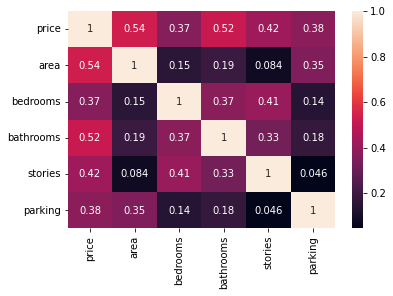

In [44]:
sns.heatmap(df.corr(), annot=True)

In [45]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [46]:
df.shape

(545, 13)

In [47]:
df['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

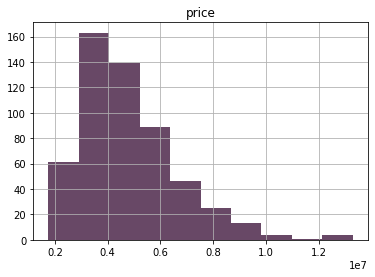

In [48]:
df.hist(column='price', color='#684866')

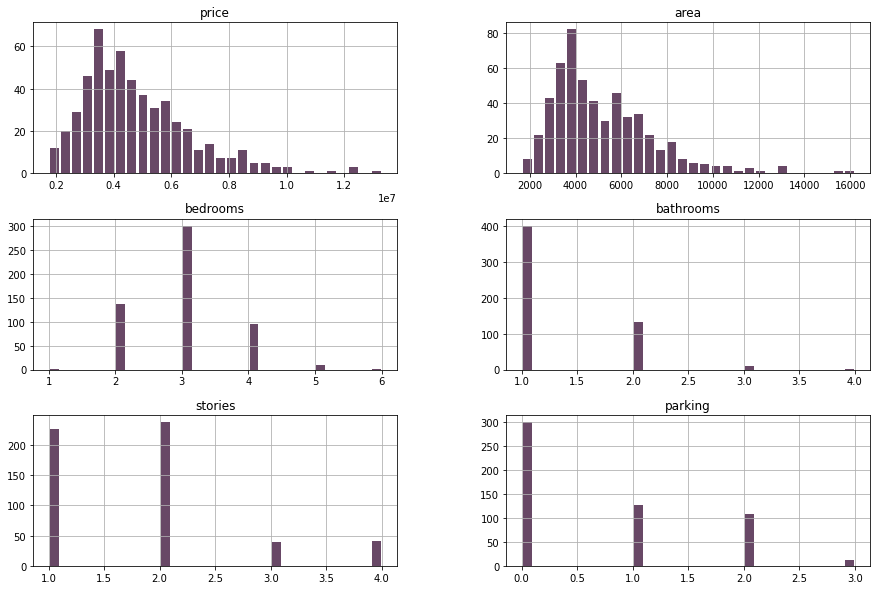

In [49]:
df.hist(rwidth=0.8, color='#684866', bins=30, figsize=(15, 10))
plt.show()

MODEL

In [50]:
# Removing outliers using z-score

from scipy import stats

df = df[
    (np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 2).all(axis=1)
]


In [51]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8400000,8875,3,1,1,yes,no,no,no,no,1,no,semi-furnished
29,8400000,5500,4,2,2,yes,no,yes,no,yes,1,yes,semi-furnished
32,8295000,4880,4,2,2,yes,no,no,no,yes,1,yes,furnished
36,8043000,7482,3,2,3,yes,no,no,yes,no,1,yes,furnished
40,7875000,6550,3,1,2,yes,no,yes,no,yes,0,yes,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Doing LabelEncoding

In [52]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

df['mainroad'] = lb.fit_transform(df['mainroad'])
df['guestroom'] = lb.fit_transform(df['guestroom'])
df['basement'] = lb.fit_transform(df['basement'])
df['hotwaterheating'] = lb.fit_transform(df['hotwaterheating'])
df['airconditioning'] = lb.fit_transform(df['airconditioning'])
df['prefarea'] = lb.fit_transform(df['prefarea'])
df['furnishingstatus'] = lb.fit_transform(df['furnishingstatus'])


In [53]:
feature_df = df.drop(columns=['price'])
feature_df

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
27,8875,3,1,1,1,0,0,0,0,1,0,1
29,5500,4,2,2,1,0,1,0,1,1,1,1
32,4880,4,2,2,1,0,0,0,1,1,1,0
36,7482,3,2,3,1,0,0,1,0,1,1,0
40,6550,3,1,2,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [54]:
label_df = df['price']
label_df

27     8400000
29     8400000
32     8295000
36     8043000
40     7875000
        ...   
540    1820000
541    1767150
542    1750000
543    1750000
544    1750000
Name: price, Length: 436, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df,test_size=0.3)

In [56]:
print("The size of Training 'X' is", X_train.shape)
print("The size of Training 'y' is", y_train.shape)
print("The size of Testing 'X' is", X_test.shape)
print("The size of Testing 'y' is", y_test.shape)

The size of Training 'X' is (305, 12)
The size of Training 'y' is (305,)
The size of Testing 'X' is (131, 12)
The size of Testing 'y' is (131,)


In [57]:
numerical = feature_df.select_dtypes('number').columns

def Evaluate(pred1):
    plt.figure(figsize=[15,11])
    for e, i in enumerate(numerical):
        plt.subplot(4,3,e+1)
        plt.scatter(y=y_train, x=X_train[i], label='Actual')
        plt.scatter(y=pred1, x=X_test[i], label='Prediction')
        plt.xlabel(X_test[i].name)
        plt.ylabel('Price')
        plt.legend()
    plt.show()

In [58]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

LINEAR REGRESSION MODEL

In [59]:
from sklearn.linear_model import LinearRegression

linearR_model = LinearRegression()
linearR_model.fit(X_train, y_train)
print("Linear Model Intercept", linearR_model.intercept_)


Linear Model Intercept 646456.3715645769


In [60]:
linerarR_y_predict = linearR_model.predict(X_test)

In [61]:
y_changed = pd.DataFrame({'Actual': y_test, 'Predicted': linerarR_y_predict.astype(int)}).head(10)
y_changed

,Actual,Predicted
141,5652500,6537897
288,4200000,4487670
400,3500000,3571484
189,5040000,3275308
262,4445000,3640593
424,3360000,3307293
298,4200000,4729055
509,2590000,4797485
250,4515000,3758747
266,4403000,4221041


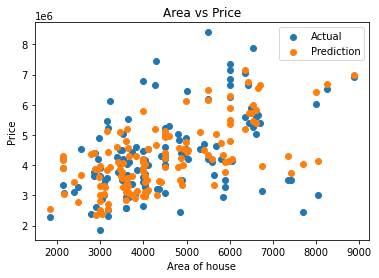

In [68]:

plt.scatter(y=y_test, x=X_test['area'], label='Actual')
plt.scatter(y=linerarR_y_predict, x=X_test['area'], label='Prediction')
plt.title('Area vs Price')
plt.xlabel('Area of house')
plt.ylabel('Price')
plt.legend()

# plt.plot(X_test, linerarR_y_predict, color="blue", linewidth=3)

plt.show()

<AxesSubplot:xlabel='area'>

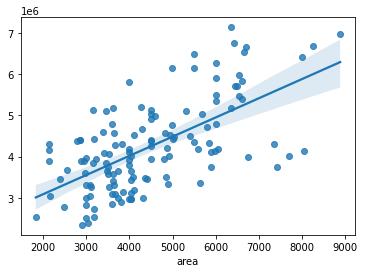

In [63]:
sns.regplot(y=linerarR_y_predict, x=X_test['area'])

In [64]:
print('Coefficients: \n', linearR_model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % np.mean((linearR_model.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % linearR_model.score(X_test, y_test))
print("Linear Model Intercept", linearR_model.intercept_)


Coefficients: 
 [ 2.87681223e+02  1.12831599e+05  7.85966813e+05  2.99453785e+05
  3.04872682e+05  2.53719845e+05  2.70822346e+05  6.24071722e+05
  5.42568768e+05  1.43176972e+05  6.05890311e+05 -2.25165882e+05]
Mean squared error: 669193432878.05
Variance score: 0.62
Linear Model Intercept 646456.3715645769


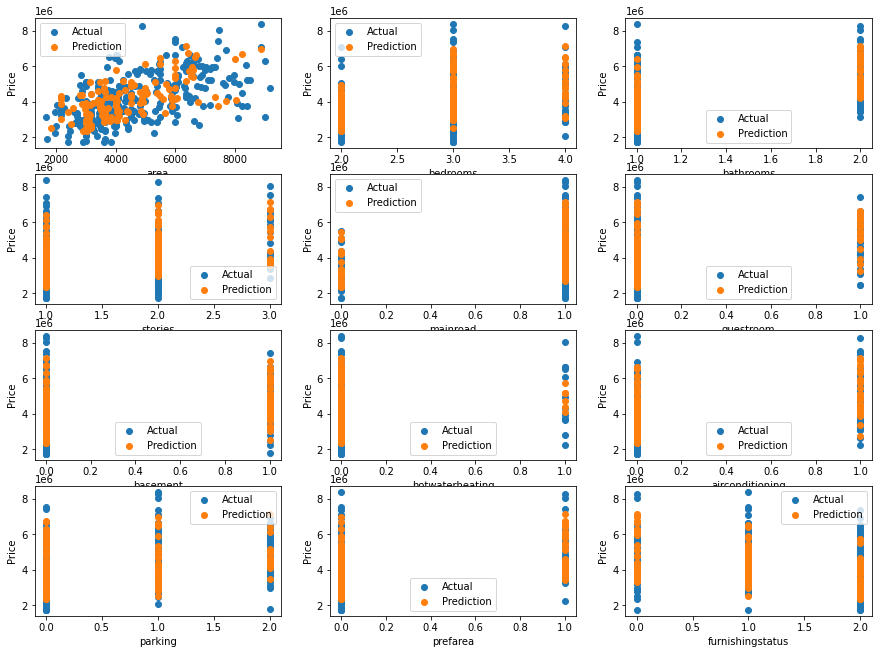

In [65]:
Evaluate(linerarR_y_predict)

Polynomial regression

In [167]:
from sklearn.preprocessing import PolynomialFeatures
polynomialM = PolynomialFeatures(degree=2)
x_poly_train = polynomialM.fit_transform(X_train)
x_poly_test = polynomialM.fit_transform(X_test)
new_linearM = LinearRegression()
new_linearM.fit(x_poly_train, y_train)

LinearRegression()

In [168]:
PolynomialR_y_predict = new_linearM.predict(x_poly_test)

In [169]:
y_changed = pd.DataFrame({'Actual': y_test, 'Predicted': PolynomialR_y_predict.astype(int)}).head(10)
y_changed

,Actual,Predicted
141,5652500,6623988
288,4200000,4755503
400,3500000,3544249
189,5040000,3457235
262,4445000,3986805
424,3360000,3698437
298,4200000,10447574
509,2590000,4840258
250,4515000,4027797
266,4403000,4357171


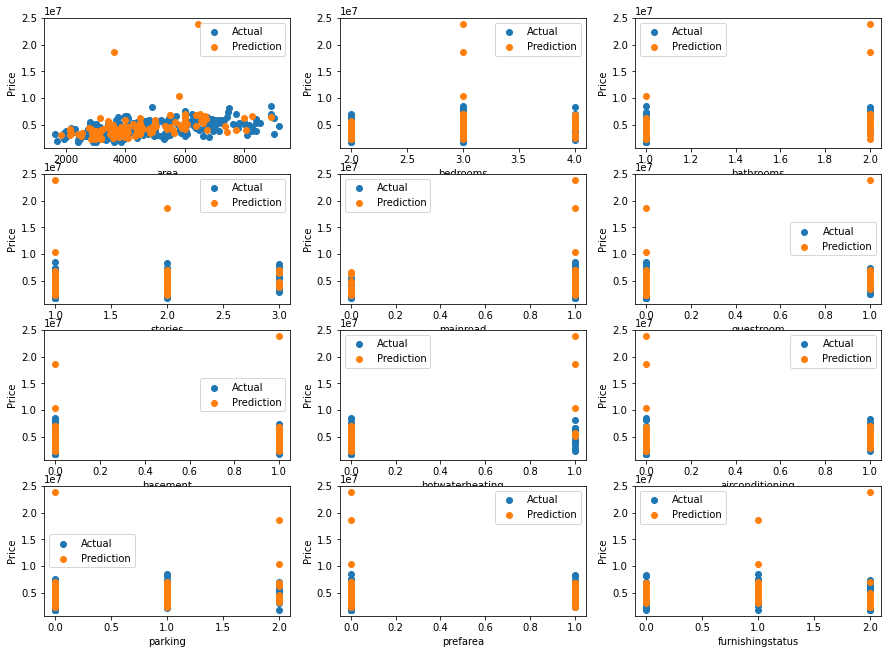

In [170]:
Evaluate(PolynomialR_y_predict)

In [171]:
c0 = new_linearM.intercept_
c1 = round(new_linearM.coef_[0],2)
c2 = round(new_linearM.coef_[1],4)
print('Scikit learn - \nEquation: %.2f + %.2f*T + %.5f*T^2' % (c0,c1,c2) )


Scikit learn - 
Equation: 762246.33 + 37.17*T + 426.93030*T^2


<AxesSubplot:xlabel='area'>

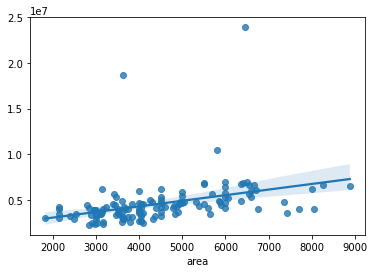

In [157]:
sns.regplot(y=PolynomialR_y_predict, x=X_test['area'])

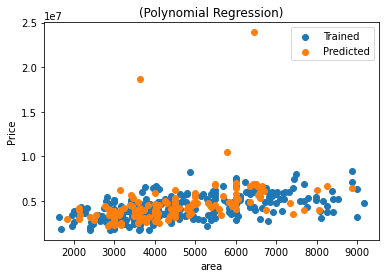

In [159]:
#Visualising the pollynomial regression model results

# plt.plot(X_test['area'], PolynomialR_y_predict, "r-", linewidth=2, label="Predictions")
 
# plt.plot(x, y, alpha = 0.4, label ='Y = X²',
#          color ='red', linestyle ='dashed',
#          linewidth = 2, marker ='D',
#          markersize = 5, markerfacecolor ='blue',
#          markeredgecolor ='blue')


plt.scatter(X_train['area'], y_train, label="Trained")
plt.scatter(X_test['area'],PolynomialR_y_predict, label="Predicted")


x = np.arange(1800, 9000, 1)
a = c2
b = c1
c = c0
y = a*(x**2) + b*x + c 


# plt.plot(x, y)


plt.title('(Polynomial Regression)')
plt.ylabel('Price')
plt.xlabel('area')
plt.legend()
plt.show()